In [16]:
import pandas as pd
import seaborn as sns
df=pd.read_csv('energydata_complete.csv')
column_names={'T1': 'Temperature in kitchen area, in Celsius', 'RH_1': 'Humidity in kitchen area',

'T2':'Temperature in living room area',

'RH_2': 'Humidity in living room area',

'T3':'Temperature in laundry room area',

'RH_3': 'Humidity in laundry room area',

'T4': 'Temperature in office room',

'RH_4': 'Humidity in office room',

'T5': 'Temperature in bathroom',

'RH_5': 'Humidity in bathroom',

'T6':'Temperature outside the building (north side)',

'RH_6': 'Humidity outside the building (north side)',

'T7': 'Temperature in ironing room',

'RH_7': 'Humidity in ironing room',

'T8': 'Temperature in teenager room 2',

'RH_8':'Humidity in teenager room 2',

'T9': 'Temperature in parents room',

'RH_9': 'Humidity in parents room',

'T_out': 'Temperature outside (from Chievres weather station)',

'Press_mm_hg': 'Pressure from Chievres weather station',

'RH_out': 'Humidity outside (from Chievres weather station)',

'Windspeed': 'Wind speed from Chievres weather station)',

'Visibility' :'Visibility from Chievres weather station',

'Tdewpoint':' Tdewpoint from Chievres weather station',

'rv1': 'Random variable 1', 

'rv2': 'Random variable 2'}
df = df.rename(columns=column_names)
df.drop('date', inplace=True, axis=1)
print(df)

       Appliances  lights  Temperature in kitchen area, in Celsius  \
0              60      30                                19.890000   
1              60      30                                19.890000   
2              50      30                                19.890000   
3              50      40                                19.890000   
4              60      40                                19.890000   
...           ...     ...                                      ...   
19730         100       0                                25.566667   
19731          90       0                                25.500000   
19732         270      10                                25.500000   
19733         420      10                                25.500000   
19734         430      10                                25.500000   

       Humidity in kitchen area  Temperature in living room area  \
0                     47.596667                        19.200000   
1                     4

<AxesSubplot:xlabel='Temperature in kitchen area, in Celsius', ylabel='Humidity in kitchen area'>

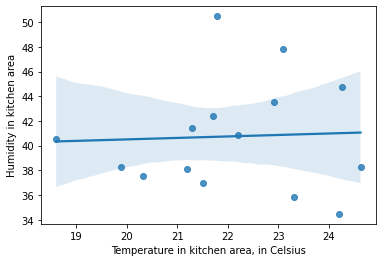

In [18]:
simple_linear_reg_df = df[['Temperature in kitchen area, in Celsius', 'Humidity in kitchen area']].sample(15, random_state=2)
#regression plot
sns.regplot(x='Temperature in kitchen area, in Celsius', y='Humidity in kitchen area',data=simple_linear_reg_df)

In [20]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Temperature in kitchen area, in Celsius', 'Humidity in kitchen area'])
heating_target = normalised_df['Temperature in kitchen area, in Celsius']
#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target,
test_size=0.3, random_state=1)
linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) 

0.034

In [21]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

10.987

In [22]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

0.043

In [23]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

0.043

In [24]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [25]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [27]:
#comparing the effects of regularisation
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(linear_model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [28]:
print(final_weights)

                                             Features  Linear_Model_Weight  \
0       Temperature outside the building (north side)            -0.372465   
1                         Temperature in parents room            -0.243418   
2                       Humidity in laundry room area            -0.140485   
3             Tdewpoint from Chievres weather station            -0.128019   
4                         Humidity in teenager room 2            -0.057170   
5                                          Appliances            -0.039941   
6                                Humidity in bathroom            -0.020820   
7                                   Random variable 1            -0.000462   
8                                   Random variable 2            -0.000462   
9            Visibility from Chievres weather station             0.000076   
10                            Humidity in office room             0.000087   
11                           Humidity in parents room           